# Data Exploration: Ready for take off!

Welcome to an exploration of the ASUU Strike Effect Analysis Project, where data-driven insights illuminate the impact of strikes on academic performance. After data preparation in `cleaning.ipynb`, we are poised to navigate through exploratory data analysis (EDA).

Here is the basic structure we'll follow. 
1. **Data Preparation**
2. **Descriptive Summary**
   - Overview of key dataset statistics.
3. **Univariate Analysis**
   - **CGPA Information**
     - Overall CGPA Change Distribution
   - **Demographic Exploration**
     - Distribution of Students (across schools, levels, faculties, etc.)
     - Average Age and Gender Distribution
   - **Strike Experience**
   - **Course Load**
   - **Skills**

4. **Multivariate Analysis**
   - **Relationship between Each Feature and CGPA**
     - Investigate impact of each demographic, strike experience, course load, and skill feature on CGPA change
     - Utilize visualizations to illustrate these relationships

5. **Insights and Conclusions**
   - Summarise Findings
   - Discuss Notable Trends and Patterns

6. **Final Data Visualizations**
   - Create Impactful Visualizations
   - Visual Representation of Key Insights

Importation

In [134]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_heatmap_new, count_and_average
import textwrap

Set Style Guide

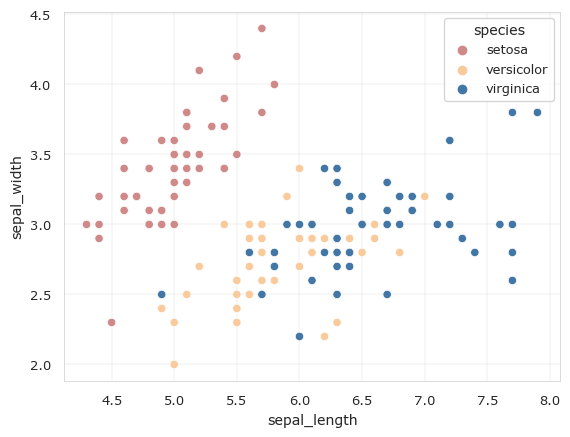

In [135]:
grey = "#eeeeee"
blue = "#4276A5"
red = "#cf8989"
cream = "#f9cb9c"
green = "#45818e"
pink = "#FF8FC3"

PALETTE = [red, cream, blue, green, pink, grey]
FONT = "Verdana"

# Set Seaborn style and color palette
sns.set(
    style="whitegrid",
    palette=PALETTE,
    context="notebook",
    font=FONT,
    font_scale=0.85,
    color_codes=True,
)

# Set Matplotlib font
mpl.rcParams["font.family"] = FONT

# Set the desired axes border linewidth
mpl.rcParams["axes.linewidth"] = 0.5
mpl.rcParams["grid.linewidth"] = 0.2

# Example Seaborn plot
iris_data = sns.load_dataset("iris")
sns.scatterplot(data=iris_data, x="sepal_length", y="sepal_width", hue="species")

## Data Preparation
Let's prepare the data for the voyage ahead.

### Loading the data. 


We're loading three dataframes.
1. General dataframe with both valid and invalid cgpa info
2. Dataframe with invalid_cgpa info
3. Dataframe with **complete cgpa** info

Note: All data here include predicted course units from cleaning.ipynb

In [136]:
# all data here include predicted course units

# complete info
df = pd.read_csv("../data/data_with_predicted_course_units.csv")

# contains students with no cgpa before or after
df_incomplete = pd.read_csv("../data/incomplete_cgpa_only.csv")

# only contains students with complete cgpa information
df_complete = pd.read_csv("../data/valid_cgpa_only.csv")

How does our data look?

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           429 non-null    object 
 1   level            429 non-null    object 
 2   age              429 non-null    int64  
 3   gender           429 non-null    object 
 4   relationship     429 non-null    object 
 5   faculty          429 non-null    object 
 6   department       429 non-null    object 
 7   strike_effect    343 non-null    object 
 8   challenge        338 non-null    object 
 9   work             429 non-null    object 
 10  prep_before      429 non-null    object 
 11  prep_after       429 non-null    object 
 12  lecture          429 non-null    object 
 13  academic_act     429 non-null    object 
 14  courses_taken    429 non-null    int64  
 15  course_unit      429 non-null    int64  
 16  cgpa_before      429 non-null    float64
 17  cgpa_after      

In [138]:
print(f"Incomplete CGPA DF: {df_incomplete.shape}")
print(f"Complete CGPA DF: {df_complete.shape}")

Incomplete CGPA DF: (109, 25)
Complete CGPA DF: (313, 25)


Remove textual data for further analysis.

In [139]:
datasets = [df, df_complete, df_incomplete]

In [140]:
textual_columns = ["strike_effect", "challenge"]

for data in datasets:
    data.drop(textual_columns, axis=1, inplace=True, errors="ignore")

Convert categories

In [141]:
categorical_columns = list(df.select_dtypes(include="object"))
numerical_columns = list(df.select_dtypes(include="number"))
boolean_columns = list(df.select_dtypes(include="bool"))

In [142]:
for data in datasets:
    data[categorical_columns] = data[categorical_columns].astype("category")

## Descriptive Summary

In the Descriptive Summary stage, we undertake the following analyses:

- Calculate fundamental summary statistics (mean, median, standard deviation, etc.) for numerical variables.
- Determine the count of distinct values within categorical variables to gain insights into diversity.
- Identify potential outliers or anomalies that might exist in the data.
  
Below is a summarized presentation of observations across all three datasets for each numerical and categorical feature:

| Numerical Feature            | Observations across all three datasets                                |
|-------------------|-------------------------------------------------------------------|
| age               | Mean age ranges from approximately 20.69 (df_incomplete) to 22.39 (df_complete)                |
|                   | Standard deviation of age varies from around 2.42 to 2.55         |
|                   | Age distribution is relatively consistent across datasets         |
|                   | Maximum age recorded is 37 years in df and df_complete            |
|                   | Minimum age recorded is 17 years in df and df_incomplete          |
| courses_taken     | The average number of courses taken is around 7.9 in all three datasets                |
|                   | Maximum number of courses taken is 12                             |
| course_unit       | Average course unit load is about 19 across all datasets                        |
| cgpa_before       | In df_incomplete, all values are 0                                |
|                   | In df_complete and df, CGPA_before ranges from 1.0 to 5.0         |
| cgpa_after        | CGPA_after ranges from approximately 0 to 5.0 in all datasets  |
| cgpa_change       | In df_complete, average CGPA change is slightly negative         |
|                   | In df and df_incomplete, average CGPA change is large and positive         |
| skill_count       | Skill count distribution is consistent across datasets            |
|                   | Majority of students have skill counts between 1 and 2            |
| school             | Varies across datasets: 2 to 11 unique categories |
| level              | Consistent: 8 unique categories                  |
| gender             | Consistent: 2 unique categories                  |
| relationship       | Varies across datasets: 5 to 6 unique categories |
| faculty            | Consistent: 12 to 15 unique categories           |
| department         | Varies across datasets: 44 (df_incomplete) to 75 (df) unique categories |
| work               | Consistent: 3 unique categories                  |
| prep_before        | Consistent: 3 unique categories                  |
| prep_after         | Consistent: 3 unique categories                  |
| lecture            | Consistent: 5 unique categories                  |
| academic_act       | Varies across datasets: 5 to 6 unique categories |
| skill_volunteer    | Consistent: 2 unique categories                  |
| skill_relevant     | Consistent: 2 unique categories                  |
| skill_unrelated    | Consistent: 2 unique categories                  |
| skill_artisan      | Consistent: 2 unique categories                  |
| skill_none         | Consistent: 2 unique categories                  |


Overall Dataframe

In [143]:
df.describe()

,age,courses_taken,course_unit,cgpa_before,cgpa_after,cgpa_change,skill_count
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,21.958042,7.878788,19.081585,2.759529,3.384776,0.625247,1.200466
std,2.554657,1.830235,3.000056,1.710041,1.245637,1.679232,0.768479
min,17.000000,0.000000,8.000000,0.000000,0.000000,-4.000000,0.000000
25%,20.000000,7.000000,17.000000,0.000000,3.090000,-0.100000,1.000000
50%,21.000000,8.000000,19.000000,3.470000,3.670000,0.010000,1.000000
75%,23.000000,9.000000,21.000000,4.000000,4.200000,0.300000,2.000000
max,37.000000,12.000000,30.000000,5.000000,5.000000,5.000000,4.000000


Valid CGPA Dataframe

In [144]:
df_complete.describe()

,age,courses_taken,course_unit,cgpa_before,cgpa_after,cgpa_change,skill_count
count,313.000000,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000
mean,22.392971,7.856230,19.073482,3.70616,3.661403,-0.044757,1.236422
std,2.474657,1.819173,3.074560,0.66251,0.683510,0.418056,0.756393
min,19.000000,3.000000,8.000000,1.00000,1.500000,-1.550000,0.000000
25%,21.000000,7.000000,17.000000,3.26000,3.200000,-0.160000,1.000000
50%,22.000000,8.000000,19.000000,3.75000,3.700000,0.000000,1.000000
75%,23.000000,9.000000,21.000000,4.19000,4.200000,0.110000,2.000000
max,37.000000,12.000000,30.000000,5.00000,5.000000,3.200000,4.000000


Incomplete CGPA Dataframe

In [145]:
df_incomplete.describe()

,age,courses_taken,course_unit,cgpa_before,cgpa_after,cgpa_change,skill_count
count,109.000000,109.000000,109.000000,109.0,109.000000,109.000000,109.000000
mean,20.688073,7.908257,19.073394,0.0,2.807798,2.807798,1.100917
std,2.417901,1.858620,2.811044,0.0,1.870563,1.870563,0.804443
min,17.000000,0.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,19.000000,7.000000,17.000000,0.0,0.000000,0.000000,1.000000
50%,20.000000,8.000000,19.000000,0.0,3.570000,3.570000,1.000000
75%,22.000000,9.000000,21.000000,0.0,4.280000,4.280000,1.000000
max,26.000000,12.000000,24.000000,0.0,5.000000,5.000000,4.000000


How many unique values are in the categorical columns? 

In [146]:
pd.DataFrame(
    {
        "Overall DataFrame": df[categorical_columns].nunique(),
        "Complete DataFrame": df_complete[categorical_columns].nunique(),
        "Incomplete DataFrame": df_incomplete[categorical_columns].nunique(),
    },
    index=categorical_columns,
)

,Overall DataFrame,Complete DataFrame,Incomplete DataFrame
school,11,10,2
level,8,8,5
gender,2,2,2
relationship,6,5,5
faculty,15,15,12
department,75,66,44
work,3,3,3
prep_before,3,3,3
prep_after,3,3,3
lecture,5,5,5


## Univariate Analysis

In the context of Univariate Analysis, we perform the following tasks:

- Create histograms to visualize the distribution of numeric variables, such as age, courses_taken, course_unit, etc.
- Generate count plots or bar plots to display the distribution of categorical variables like school, level, gender, and others.

For enhanced clarity, we've organized our analysis into specific column groupings:

| Grouping                | Columns                                    |
|-------------------------|--------------------------------------------|
| Demographic Information | school, level, age, gender, relationship, faculty, department |
| Strike Experience       | work, prep_before, prep_after, lecture, academic_act |
| Course Load             | courses_taken, course_unit                  |
| Skills                  | skill_volunteer, skill_relevant, skill_unrelated, skill_artisan, skill_none, skill_count |
| CGPA Information        | cgpa_before, cgpa_after, cgpa_change        |



### Demographic Exploration

Where are the students from?

In [147]:
df["school"].value_counts(normalize=True) * 100

university of lagos                                                         96.270396
university of ibadan                                                         0.932401
funaab                                                                       0.466200
lagos state university                                                       0.466200
university of nigeria                                                        0.466200
alex ekwueme federal university ndufu-alike ikwo, abakaliki ebonyi state     0.233100
bayero university kano                                                       0.233100
federal university of petroleum resources effurun delta state                0.233100
oou ogun state                                                               0.233100
university of abuja                                                          0.233100
university of uyo                                                            0.233100
Name: school, dtype: float64

What are their academic levels?

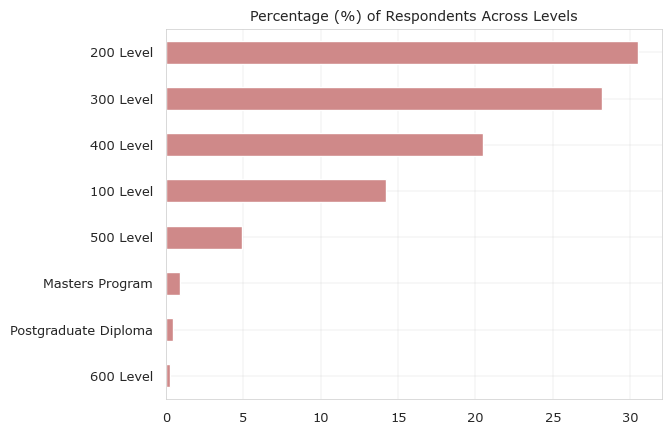

In [148]:
prop_by_level = df["level"].value_counts(normalize=True).sort_values() * 100

prop_by_level.plot(
    kind="barh", title="Percentage (%) of Respondents Across Levels", xlabel=""
)

What about faculties?

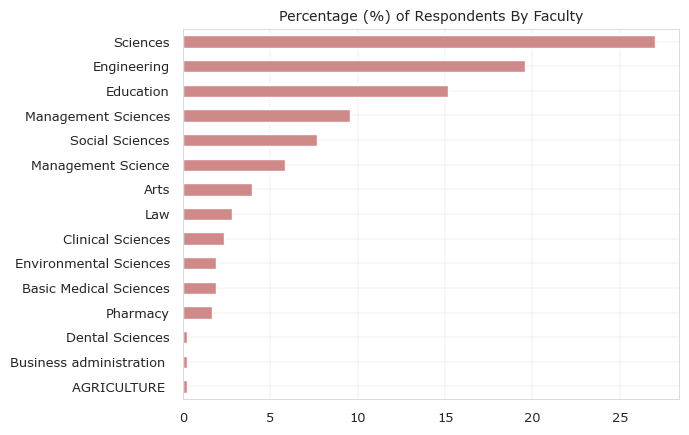

In [149]:
prop_by_faculty = df["faculty"].value_counts(normalize=True).sort_values() * 100

prop_by_faculty.plot(
    kind="barh",
    title="Percentage (%) of Respondents By Faculty",
)

What about departments?

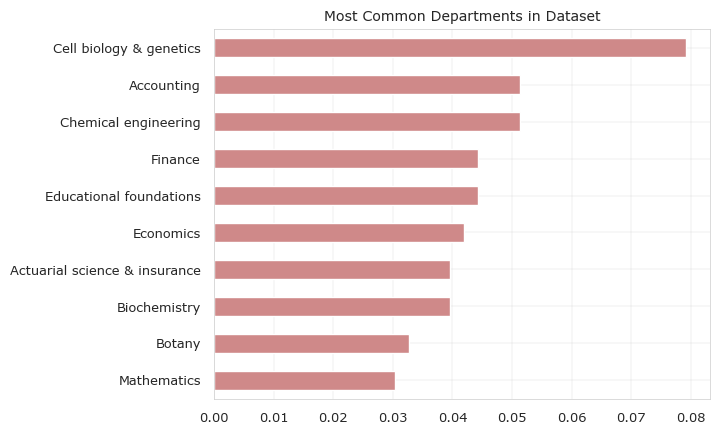

In [150]:
prop_by_dept = df["department"].value_counts(normalize=True).sort_values()

prop_by_dept.tail(10).plot(
    kind="barh",
    title="Most Common Departments in Dataset",
)

What's the share by age?

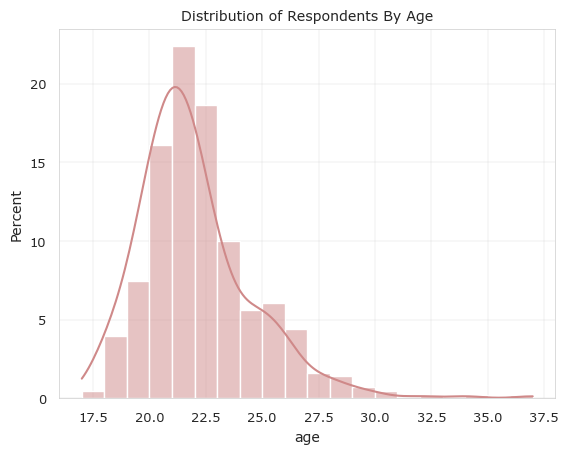

In [151]:
sns.histplot(data=df, x="age", kde=True, bins=20, stat="percent")
plt.title("Distribution of Respondents By Age")

How is the data distributed by gender?

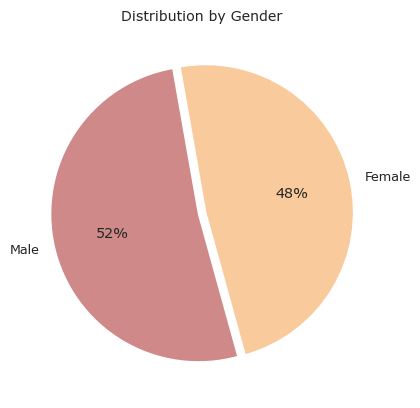

In [152]:
prop_by_gender = df["gender"].value_counts(normalize=True) * 100

# set a value for the separation of the slices
explode = (0.025, 0.025)

# plotting the pie chart on a column in the counted dataframe
prop_by_gender.plot(kind="pie", autopct="%1.0f%%", explode=explode, startangle=100)


plt.title("Distribution by Gender")
plt.ylabel("")

What was the relationship status?

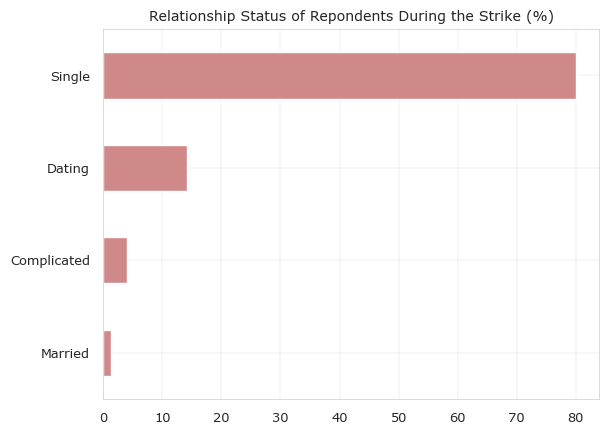

In [153]:
prop_by_relationship = (
    df["relationship"].value_counts(normalize=True).sort_values() * 100
)

prop_by_relationship.tail(4).plot(
    kind="barh", title="Relationship Status of Repondents During the Strike (%)"
)

### Strike Experience

How many people worked during the strike?

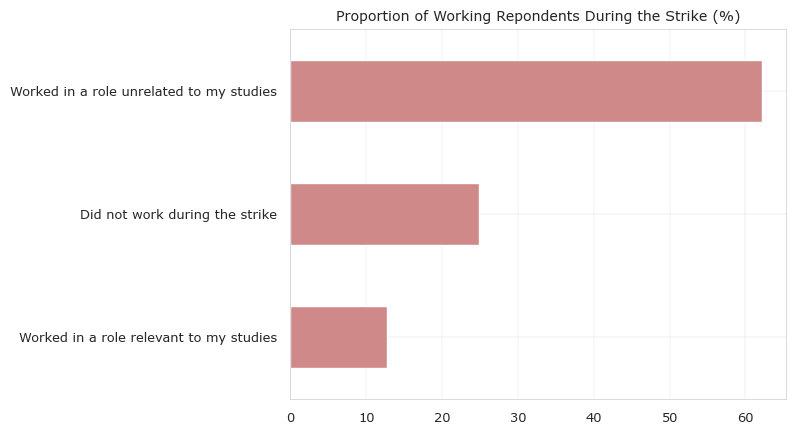

In [154]:
prop_by_work = df["work"].value_counts(normalize=True).sort_values() * 100

prop_by_work.tail(4).plot(
    kind="barh",
    title="Proportion of Working Repondents During the Strike (%)",
)

How did Preparation change?

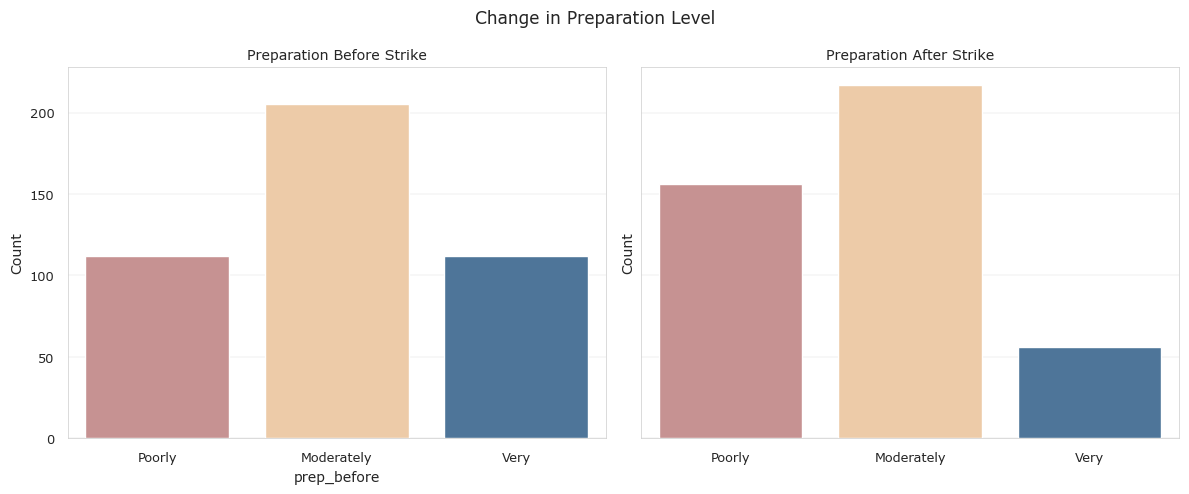

In [155]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot prep_before
sns.countplot(
    data=df, x="prep_before", order=["Poorly", "Moderately", "Very"], ax=axes[0]
)
axes[0].set_title("Preparation Before Strike")
axes[0].set_ylabel("Count")

# Plot prep_after
sns.countplot(
    data=df, x="prep_after", order=["Poorly", "Moderately", "Very"], ax=axes[1]
)
axes[1].set_title("Preparation After Strike")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("")

plt.suptitle("Change in Preparation Level")

# Adjust layout
plt.tight_layout()

Did lectures worsen?

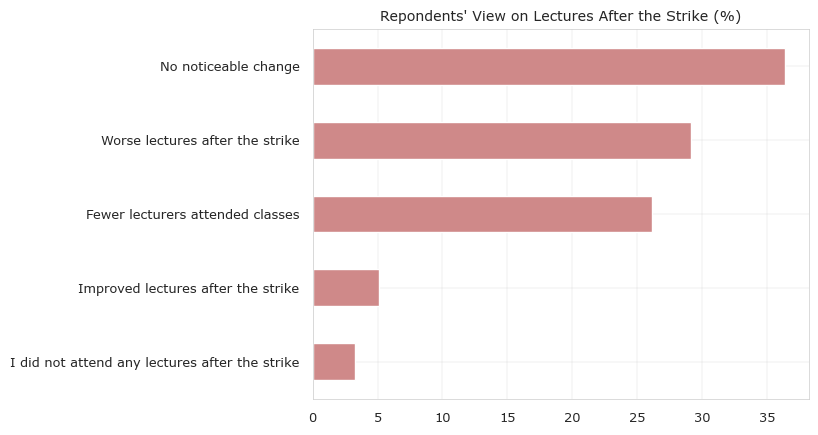

In [156]:
prop_by_lecture = df["lecture"].value_counts(normalize=True).sort_values() * 100

prop_by_lecture.plot(
    kind="barh",
    title="Repondents' View on Lectures After the Strike (%)",
)

How often did students engage in academic activities?

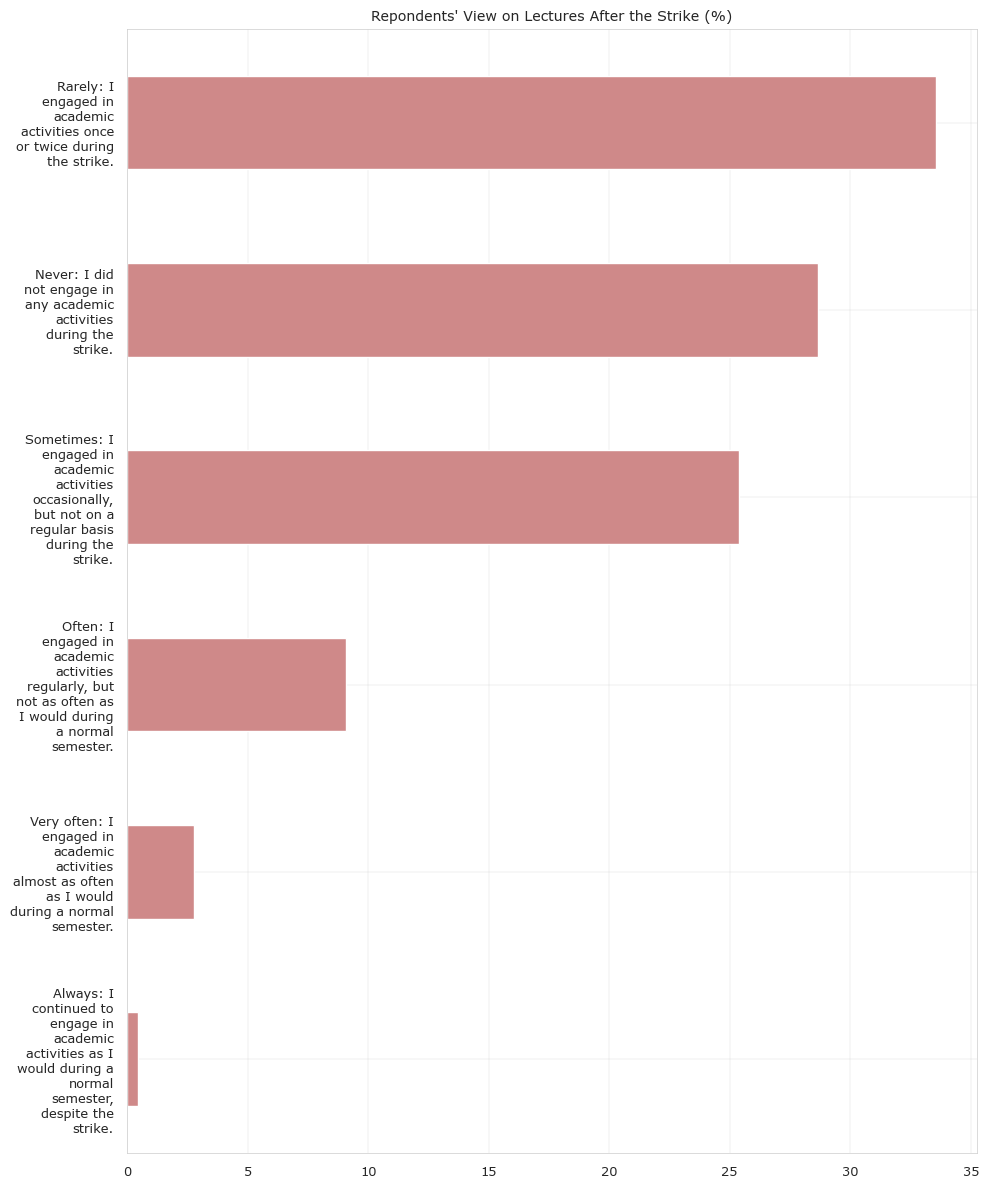

In [157]:
prop_by_activity = df["academic_act"].value_counts(normalize=True).sort_values() * 100

plt.figure(figsize=(10, 12))
prop_by_activity.plot(
    kind="barh",
    title="Repondents' View on Lectures After the Strike (%)",
)
plt.yticks(
    ticks=plt.yticks()[0],
    labels=[textwrap.fill(label, 15) for label in prop_by_activity.index],
)
plt.tight_layout()

### Course Load

How are the courses distributed?

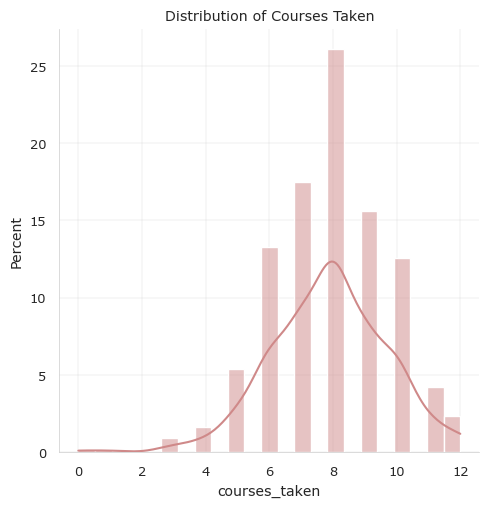

In [158]:
sns.displot(
    data=df,
    x="courses_taken",
    kde=True,
    stat="percent",
).set(title="Distribution of Courses Taken")

How are the course units distributed?

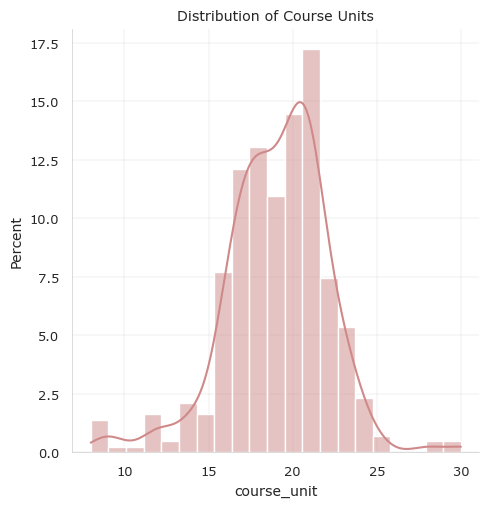

In [159]:
sns.displot(
    data=df,
    x="course_unit",
    kde=True,
    stat="percent",
).set(title="Distribution of Course Units")

### Skills

How many people acquired a skills? 

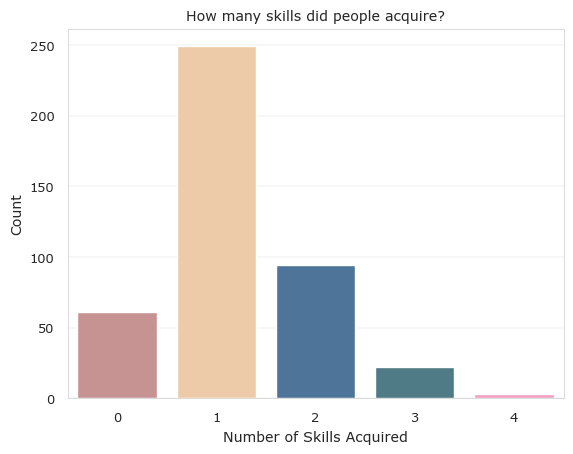

In [160]:
sns.countplot(
    data=df,
    x="skill_count",
    # kde=True,
    # stat='percent',
).set(
    title="How many skills did people acquire?",
    ylabel="Count",
    xlabel="Number of Skills Acquired",
)

What where the most commonly acquired skills?

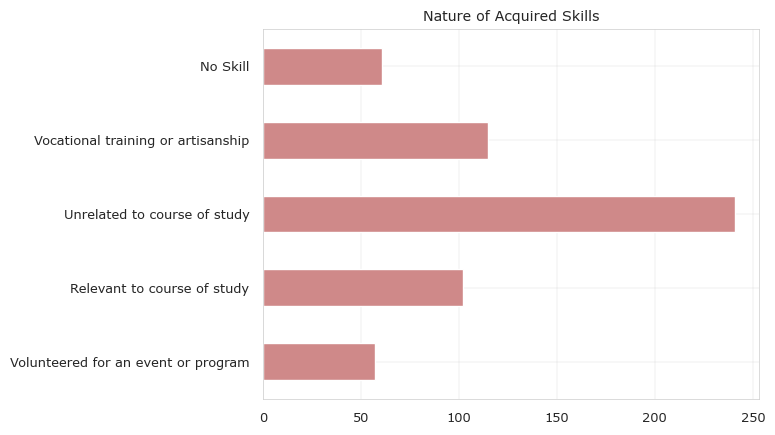

In [180]:
df[boolean_columns].sum().plot(kind="barh", title="Nature of Acquired Skills")

# Define custom tick positions and labels
tick_positions = range(len(boolean_columns))
tick_labels = [
    "Volunteered for an event or program",
    "Relevant to course of study",
    "Unrelated to course of study",
    "Vocational training or artisanship",
    "No Skill",
]

# Set custom tick positions and labels
plt.yticks(tick_positions, tick_labels)

What are the most common skill combinations? 

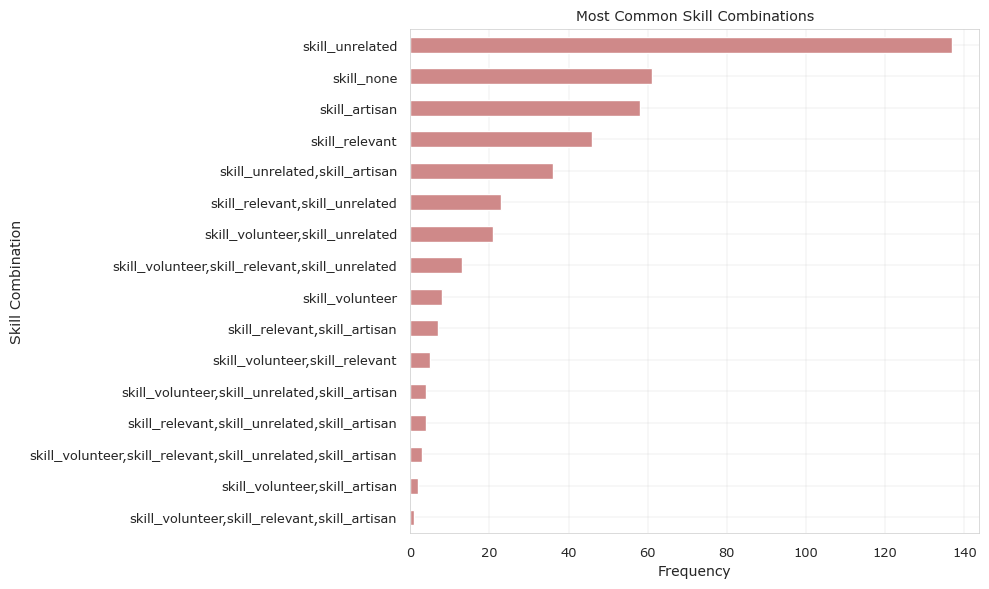

In [184]:
# Count the occurrences of each skill combination
skill_combination_counts = (
    df[boolean_columns]
    .apply(lambda row: ",".join(row.index[row]), axis=1)
    .value_counts()
)

# Create a bar plot for the most common skill combinations
plt.figure(figsize=(10, 6))
skill_combination_counts.sort_values().plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Skill Combination")
plt.title("Most Common Skill Combinations")
plt.tight_layout()

# Show the plot
plt.show()

### CGPA Information

In [ ]:
mean_cgpa_before = df_complete.cgpa_before.mean()
mean_cgpa_after = df_complete.cgpa_after.mean()

print(f"Mean CGPA before: {round(mean_cgpa_before, 3)}")
print(f"Mean CGPA after: {round(mean_cgpa_after, 3)}")
print(f"Change in mean CGPA: {round(mean_cgpa_after - mean_cgpa_before, 3)}")

Mean CGPA before: 3.706
Mean CGPA after: 3.661
Change in mean CGPA: -0.045


Change in CGPA Distribution

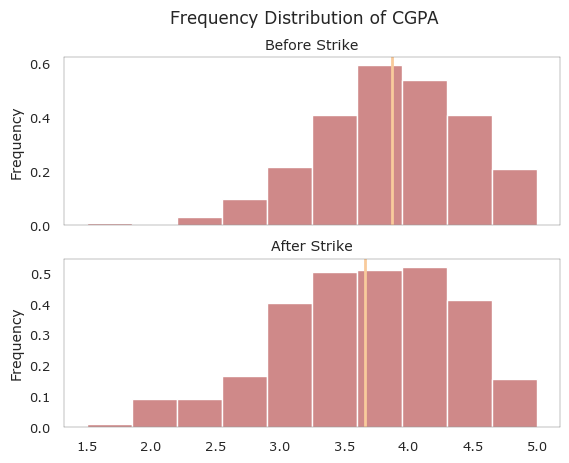

In [ ]:
fig, ax = plt.subplots(2, 1)
df_complete.cgpa_before.plot(kind="hist", ax=ax[0], title="Before Strike", density=True)
ax[0].axvline(mean_cgpa_before, color=cream, linestyle="-", linewidth=2)

df_complete.cgpa_after.plot(
    kind="hist", ax=ax[1], title="After Strike", density=True, sharex=True
)
ax[1].axvline(mean_cgpa_after, color=cream, linestyle="-", linewidth=2)

plt.suptitle("Frequency Distribution of CGPA")

How much did CGPA change per individual?

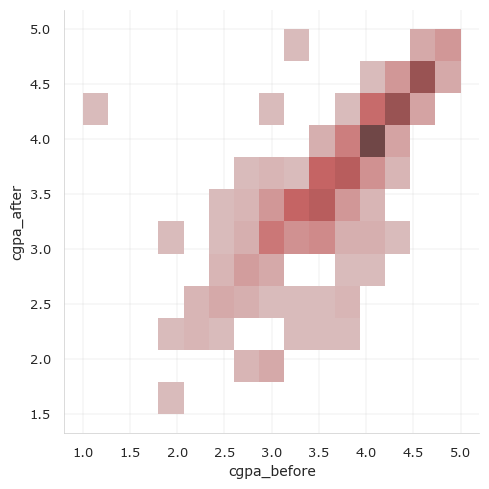

In [91]:
sns.displot(
    data=df_complete,
    x="cgpa_before",
    y="cgpa_after",
    # rug=True,
    # col="gender",
    # kind="kde"
)

## Deep Dive

Deepdive of target (CGPA change) across each feature

For this, we will go right ahead and generate a five figure summary for each feature of interest against the target feature (CGPA_CHANGE)

In [ ]:
# Features of interest and target feature
features_of_interest = ["level", "age", "gender", "relationship"]
target_feature = "cgpa_change"

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 25))

# Iterate through the features of interest and create individual barplots on separate axes
for idx, feature in enumerate(features_of_interest):
    sns.boxplot(x=feature, y=target_feature, data=df_complete, ax=axes[idx])
    axes[idx].set_title(f"{target_feature} vs {feature}")
    axes[idx].set_ylabel(target_feature)

In [ ]:
departments_of_interest = [
    "Electrical & electronics engineering",
    "Mathematics",
    "Botany",
    "Actuarial science & insurance",
    "Economics",
    "Educational foundations",
    "Finance",
    "Chemical engineering",
    "Accounting",
    "Cell biology & genetics",
]

# Using the .isin() method to filter the DataFrame
filtered_departments = df_complete[
    df_complete["department"].isin(departments_of_interest)
]

plt.figure(figsize=(15, 10))
sns.boxplot(
    x="department",
    y=target_feature,
    data=filtered_departments,
    order=departments_of_interest,
)
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[textwrap.fill(label, 15) for label in departments_of_interest],
)
plt.title("Boxplot for Most Common Departments in Dataset")
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="faculty", y=target_feature, data=df_complete)
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[textwrap.fill(label, 15) for label in df_complete["faculty"].unique()],
)
plt.title("Boxplot for faculties")
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df_complete, x="lecture", y="cgpa_change")
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[textwrap.fill(label, 15) for label in df_complete["lecture"].unique()],
)
plt.show()

In [ ]:
plt.figure(figsize=(10, 12))
sns.barplot(data=df_complete, y="academic_act", x="cgpa_change")
plt.yticks(
    ticks=plt.yticks()[0],
    labels=[textwrap.fill(label, 15) for label in df_complete["academic_act"].unique()],
)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_complete, x="work", y="cgpa_change")
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[textwrap.fill(label, 15) for label in df_complete["work"].unique()],
)
plt.show()

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(data=df_complete, y="skills", x="cgpa_change")
plt.yticks(
    ticks=plt.yticks()[0],
    labels=[textwrap.fill(label, 40) for label in df_complete["skills"].unique()],
)
plt.show()

In [ ]:
plot_heatmap_new(
    df_complete, "prep_before", "prep_after", "cgpa_change", [red, cream, blue]
)

In [ ]:
plot_heatmap_new(
    df_complete[df_complete["gender"] == "Male"],
    "prep_before",
    "prep_after",
    "cgpa_change",
    "RdBu",
    title="for males only",
)
plot_heatmap_new(
    df_complete[df_complete["gender"] == "Female"],
    "prep_before",
    "prep_after",
    "cgpa_change",
    "RdBu",
    title="for females only",
)

In [ ]:
for level in df_complete["level"].unique():
    plot_heatmap_new(
        df_complete[df_complete["level"] == level],
        "prep_before",
        "prep_after",
        "cgpa_change",
        "RdBu",
        title=f"for {level} only",
    )

In [ ]:
for level in df_complete["relationship"].unique():
    plot_heatmap_new(
        df_complete[df_complete["relationship"] == level],
        "prep_before",
        "prep_after",
        "cgpa_change",
        "RdBu",
        title=f"for {level}s only",
    )

In [ ]:
for level in df_complete["faculty"].unique():
    plot_heatmap_new(
        df_complete[df_complete["faculty"] == level],
        "prep_before",
        "prep_after",
        "cgpa_change",
        title=f"for {level} only",
    )

In [ ]:
df.head(2)

In [ ]:
count_and_average("level", "courses_taken", df_complete)

In [ ]:
count_and_average("level", "course_unit", df_complete)

In [ ]:
count_and_average("department", "courses_taken", filtered_departments)

In [ ]:
count_and_average("department", "course_unit", filtered_departments)

In [ ]:
count_and_average("faculty", "courses_taken", df_complete)

In [ ]:
count_and_average("faculty", "course_unit", df_complete)